In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('wfp_food_price_bgd.csv')
dataset.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,7/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182
1,7/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101
2,8/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620
3,8/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053
4,9/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531


In [3]:
dataset['year'] = pd.to_datetime(dataset['date']).dt.year
dataset['month'] = pd.to_datetime(dataset['date']).dt.month
dataset['day'] = pd.to_datetime(dataset['date']).dt.day

In [4]:
dataset = dataset.drop('date', axis=1)  
dataset['market_cleaned'] = dataset['market'].str.replace('Sadar', '', regex=False)\
                                     .str.replace('Division', '', regex=False)\
                                     .str.replace('Market', '', regex=False)

dataset.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned
0,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka
1,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka
2,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka
3,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka
4,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka


In [5]:
from geopy.distance import geodesic

reference_point = (23.8103, 90.4125)
dataset['distance_from_center'] = dataset.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), reference_point).kilometers, axis=1
)

In [6]:
dataset = dataset.drop('admin1', axis=1) 
dataset = dataset.drop('admin2', axis=1) 
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned,distance_from_center
0,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka,0.256909
1,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka,0.256909
2,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka,0.256909
3,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka,0.256909
4,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka,0.256909


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
dataset['market_encoded'] = le.fit_transform(dataset['market_cleaned'])

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
# Extract latitude and longitude for clustering
geo_data = dataset[['latitude', 'longitude']].values

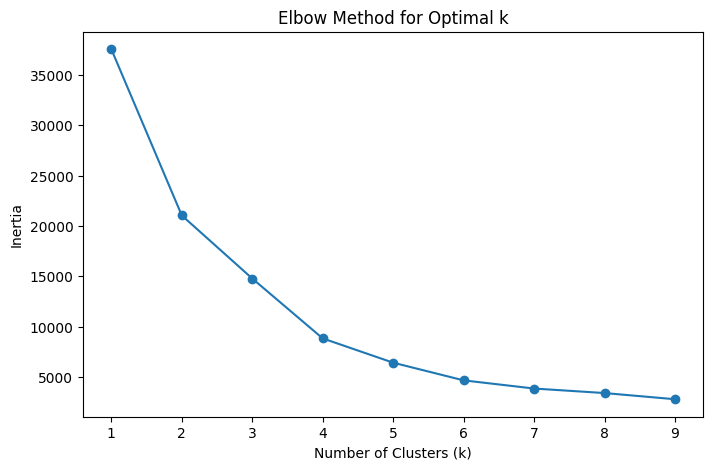

In [11]:
# Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(geo_data)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [12]:
# Perform k-means clustering
optimal_k = 3  # Replace with your chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dataset['cluster'] = kmeans.fit_predict(geo_data)

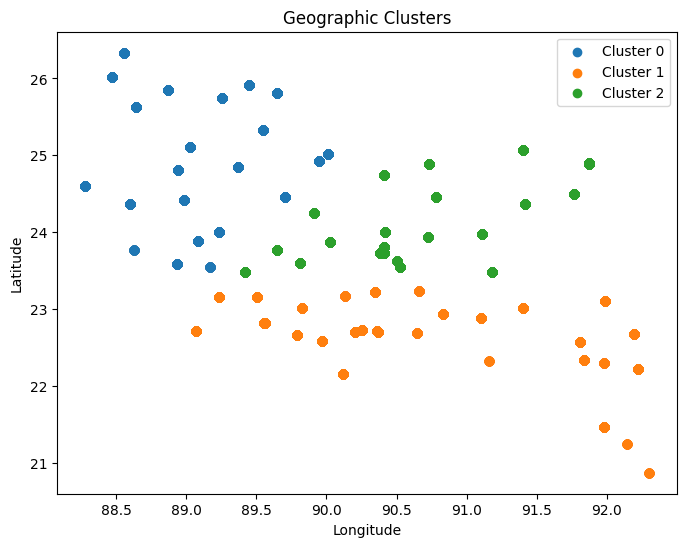

In [13]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = dataset[dataset['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}')

plt.title('Geographic Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [14]:
# Convert to lowercase and strip extra whitespace
dataset['category'] = dataset['category'].str.lower().str.strip()

In [15]:
dataset['category'].unique()

array(['cereals and tubers', 'oil and fats', 'pulses and nuts',
       'meat, fish and eggs', 'miscellaneous food',
       'vegetables and fruits', 'milk and dairy', 'non-food'],
      dtype=object)

In [16]:
# Define a mapping for standardizing category names
category_mapping = {
    'cereals and tubers': 'cereals and tubers',
    'oil and fats': 'oil and fats',
    'pulses and nuts': 'pulses and nuts',
    'meat, fish and eggs': 'meat, fish and eggs',
    'miscellaneous food': 'miscellaneous food',
    'vegetables and fruits' : 'vegetables and fruits',
    'milk and dairy': 'milk and dairy',
    'non-food': 'non-food',
}

# Apply mapping
dataset['category'] = dataset['category'].replace(category_mapping)

In [17]:
dataset['category_encoded'] = le.fit_transform(dataset['category'])

In [18]:
# Convert to lowercase, strip extra spaces, and remove special characters
dataset['commodity'] = dataset['commodity'].str.lower().str.strip()
dataset['commodity'] = dataset['commodity'].str.replace(r'[^\w\s\(\)/,]', '', regex=True)

In [19]:
dataset['commodity'].unique()

array(['rice (coarse, br8/ 11/, guti sharna)', 'wheat', 'rice (coarse)',
       'oil (palm)', 'lentils (masur)', 'wheat flour',
       'rice (medium grain)', 'rice (coarse, guti sharna)',
       'potatoes (holland, white)', 'eggs (brown)',
       'fish (live, pangasius)', 'meat (chicken, broiler)', 'sugar',
       'chili (green)', 'garlic (imported, china)', 'gourd (bottle)',
       'onions (imported, china)', 'papaya (green)', 'snake gourd',
       'spinach (malabar)', 'oil (soybean, fortified)', 'bananas (ripe)',
       'spinach (red)', 'rice (kajla)', 'rice (nurjahan)', 'rice (pyzam)',
       'eggs (white)', 'fish (dry, belt 1012)', 'fish (live, tilapia)',
       'meat (beef)', 'meat (chicken, sonali)', 'milk', 'milk (powder)',
       'chili (whole, dry, indian teja)', 'hyacinth (sim)',
       'salt (iodized, molla)', 'turmeric (powder, fresh)',
       'dishwashing liquid', 'fuel (gas)', 'fuel (petrol)',
       'handwash soap', 'laundry detergent', 'toilet paper', 'toothpaste',
    

In [20]:
# Define a mapping for simplification
commodity_mapping = {
    'rice (coarse, br8/ 11/, guti sharna)': 'rice guti_sharna',
    'rice (coarse)': 'rice coarse',
    'oil (palm)': 'oil palm',
    'lentils (masur)': 'lentils masur',
    'rice (medium grain)': 'rice medium_grain',
    'rice (coarse, guti sharna)' : 'rice guti_sharna',
    'potatoes (holland, white)' : 'potatoes holland_white',
    'eggs (brown)' : 'eggs brown',
    'fish (live, pangasius)' : 'fish pangasius',
    'meat (chicken, broiler)' : 'meat chicken_broiler',
    'sugar' : 'sugar',
    'chili (green)': 'chili green',
    'garlic (imported, china)': 'garlic china',
    'gourd (bottle)': 'gorud bottle',
    'onions (imported, china)': 'oniions china',
    'snake gourd.*': 'snake gourd',
    'papaya (green)': 'papaya green',
    'spinach (malabar)' : 'spinach malabar',
    'oil (soybean, fortified)': 'oil soybean_fortified',
    'bananas (ripe)': 'bananas ripe',
    'spinach (red)' : 'spinach red',
    'rice (kajla)' : 'rice kajla',
    'rice (nurjahan)' : 'rice nurjahan', 
    'rice (pyzam)' : 'rice pyzam',
    'eggs (white)' : 'eggs white',
    'fish (dry, belt 1012)' : 'fish dry_belt_1012',
    'fish (live, tilapia)' : 'fish live_tilapia',
    'meat (beef)' : 'meat beef',
    'meat (chicken, sonali)' : 'meat chicken_sonali',
    'milk' : 'milk',
    'milk (powder)' : 'milk powder',
    'chili (whole, dry, indian teja)' : 'chili whole_dry_indian_teja',
    'hyacinth (sim)' : 'hyacinth sim',
    'salt (iodized, molla)' : 'salt iodized_molla', 
    'turmeric (powder, fresh)' : 'turmeric powder_fresh',
    'dishwashing liquid' : 'dishwashing liquid', 
    'fuel (gas)'  : 'fuel gas', 
    'fuel (petrol)' : 'fuel petrol',
    'handwash soap' : 'handwash soap', 
    'laundry detergent' : 'laundry detergent', 
    'toilet paper' : 'toilet paper', 
    'toothpaste' : 'toothpaste',
    'chickpeas' : 'chickpeas', 
    'apples (royal gala)' : 'apples royal_gala', 
    'bananas (green)'   : 'bananas green', 
    'carrots' : 'carrots',
    'cucumber (short, khira)' : 'cucumber short_khira', 
    'eggplants' : 'eggplants', 
    'ginger (imported)' : 'ginger imported',
    'gourd (bitter)' : 'gourd bitter', 
    'lemon (medium size)' : 'lemon medium_size',
    'onions (imported, india)' : 'onions india', 
    'oranges (malta)' : 'oranges malta', 
    'pumpkin' : 'pumpkin',
    'tomatoes (red)' : 'tomatoes red', 
    'rice (brri28)' : 'rice brri28', 
    'rice (brri29)' : 'rice brri29', 
    'rice (gazi)' : 'rice gazi',
    'bathing soap' : 'bathing soap',
    'firewood' : 'firewood', 
    'fuel (diesel)' : 'fuel diesel', 
    'fuel (kerosene)' : 'fuel kerosene',
    'sanitary pads' : 'sanitary pads',
    'oil (mustard)' : 'oil mustard', 
    'beans (mung, large grain)' : 'beans mung_large_grain',
    'cabbage' : 'cabbage', 
    'rice (brri49)' : 'rice brri49', 
    'fish (tilapia, fresh)' : 'fish tilapia_fresh'
}

In [21]:
import re

In [22]:
dataset['commodity'] = dataset['commodity'].replace(commodity_mapping, regex=True)

In [23]:
dataset['commodity_encoded'] = le.fit_transform(dataset['commodity'])

In [24]:
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka,0.256909,13,2,0,51
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka,0.256909,13,2,0,68
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka,0.256909,13,2,0,51
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka,0.256909,13,2,0,68
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka,0.256909,13,2,0,51


In [25]:
dataset['unit'].unique()

array(['100 KG', 'KG', 'L', '1 piece', '500 G', '12 KG', '1 Roll',
       '10 pcs'], dtype=object)

In [26]:
def extract_unit_data(unit):
    match = re.match(r'([\d.]+)?\s*([a-zA-Z]+)', unit)
    if match:
        quantity = float(match.group(1)) if match.group(1) else 1.0  # Default to 1 if no numeric value
        unit_type = match.group(2).lower()
        return quantity, unit_type
    return None, None

In [27]:
def standardize_units(quantity, unit_type):
    conversion_factors = {
        'kg': 1.0,
        'g': 0.001,  # Convert grams to kilograms
        'l': 1.0,
        'piece': 1.0,
        'pcs': 1.0,
        'roll': 1.0  # Assuming 1 roll = 1 unit
    }
    if unit_type in conversion_factors:
        return quantity * conversion_factors[unit_type]
    return None  # Handle unknown units

In [28]:
dataset['quantity'], dataset['unit_type'] = zip(*dataset['unit'].map(extract_unit_data))

In [29]:
dataset['standardized_unit'] = dataset.apply(lambda x: standardize_units(x['quantity'], x['unit_type']), axis=1)

# Compute Standardized Price
dataset['standardized_price'] = dataset['price'] / dataset['standardized_unit']
dataset.head()  

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,...,market_cleaned,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded,quantity,unit_type,standardized_unit,standardized_price
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,12.6140
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,...,Dhaka,0.256909,13,2,0,68,100.0,kg,100.0,10.5560
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,12.8875
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,...,Dhaka,0.256909,13,2,0,68,100.0,kg,100.0,10.6000
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,14.1550


In [30]:
dataset['pricetype'].unique()

array(['Wholesale', 'Retail'], dtype=object)

In [31]:
dataset['pricetype_encoded'] = le.fit_transform(dataset['pricetype'])

In [32]:
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,...,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded,quantity,unit_type,standardized_unit,standardized_price,pricetype_encoded
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,...,0.256909,13,2,0,51,100.0,kg,100.0,12.6140,1
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,...,0.256909,13,2,0,68,100.0,kg,100.0,10.5560,1
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,...,0.256909,13,2,0,51,100.0,kg,100.0,12.8875,1
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,...,0.256909,13,2,0,68,100.0,kg,100.0,10.6000,1
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,...,0.256909,13,2,0,51,100.0,kg,100.0,14.1550,1


In [33]:
dataset.to_csv('wfp_food_price_cleaned.csv', index=False)

In [34]:
target = 'standardized_price'
features = ['year', 'month', 'day', 'latitude', 'longitude', 'distance_from_center', 'market_encoded', 'cluster', 'category_encoded', 'commodity_encoded','standardized_unit', 'pricetype_encoded']

In [35]:
X = dataset[features]
y = dataset[target]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
scaler = MinMaxScaler()

# Ensure assignment happens on the original DataFrame explicitly
X.loc[:, ['latitude', 'longitude', 'distance_from_center', 'standardized_unit']] = scaler.fit_transform(
    X[['latitude', 'longitude', 'distance_from_center', 'standardized_unit']]
)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 11.476485624820947
MAE: 2.8592012052445783
R²: 0.9377712168511633
